# Introducción y contexto

El **Sleep Health and Lifestyle Dataset** es un conjunto de datos que abarca información detallada sobre la salud del sueño y los hábitos diarios de 400 individuos. Consta de **13 variables**, que incluyen aspectos demográficos, métricas del sueño, actividad física, niveles de estrés y parámetros cardiovasculares.  

Este dataset ofrece una oportunidad valiosa para analizar la relación entre el estilo de vida y la calidad del sueño, así como la presencia de trastornos del sueño.  

## Variables 
- **Person ID**: Un identificador único para cada individuo.
- **Gender**: El género de la persona (Masculino/Femenino).
- **Age**: La edad de la persona en años.
- **Occupation**: La ocupación o profesión de la persona.
- **Sleep Duration (hours)**: El número de horas que la persona duerme al día.
- **Quality of Sleep (scale: 1-10)**: Una calificación subjetiva de la calidad del sueño, en una escala del 1 al 10.
- **Physical Activity Level (minutes/day)**: El número de minutos que la persona dedica a la actividad física diaria.
- **Stress Level (scale: 1-10)**: Una calificación subjetiva del nivel de estrés experimentado por la persona, en una escala del 1 al 10.
- **BMI Category**: La categoría de IMC de la persona (por ejemplo, Bajo peso, Normal, Sobrepeso).
- **Blood Pressure (systolic/diastolic)**: La medición de la presión arterial de la persona, indicada como presión sistólica sobre presión diastólica.
- **Heart Rate (bpm)**: La frecuencia cardíaca en reposo de la persona en latidos por minuto.
- **Daily Steps**: El número de pasos que la persona camina al día.
- **Sleep Disorder**: La presencia o ausencia de un trastorno del sueño en la persona (Ninguno, Insomnio, Apnea del sueño).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
import warnings


In [3]:
# Cargar datos 
data_base = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Explorar los datos

In [4]:
# Ajustar la visualización del ancho de la tabla
pd.set_option('display.width', 200)

# Mostrar las primeras filas del DataFrame
data_base.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:


# Asegurar que los nombres de columnas no tengan espacios
data_base.columns = data_base.columns.str.replace(" ", "_")

# Reemplazar NaN en la columna 'Sleep_Disorder' con "None"
data_base['Sleep_Disorder'] = data_base['Sleep_Disorder'].fillna("None")

# Verificar que los cambios se hayan aplicado
print(data_base['Sleep_Disorder'].value_counts(dropna=False))  # Esto mostrará cuántos valores son "None"

Sleep_Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


# Gráficos de Variables Categóricas 

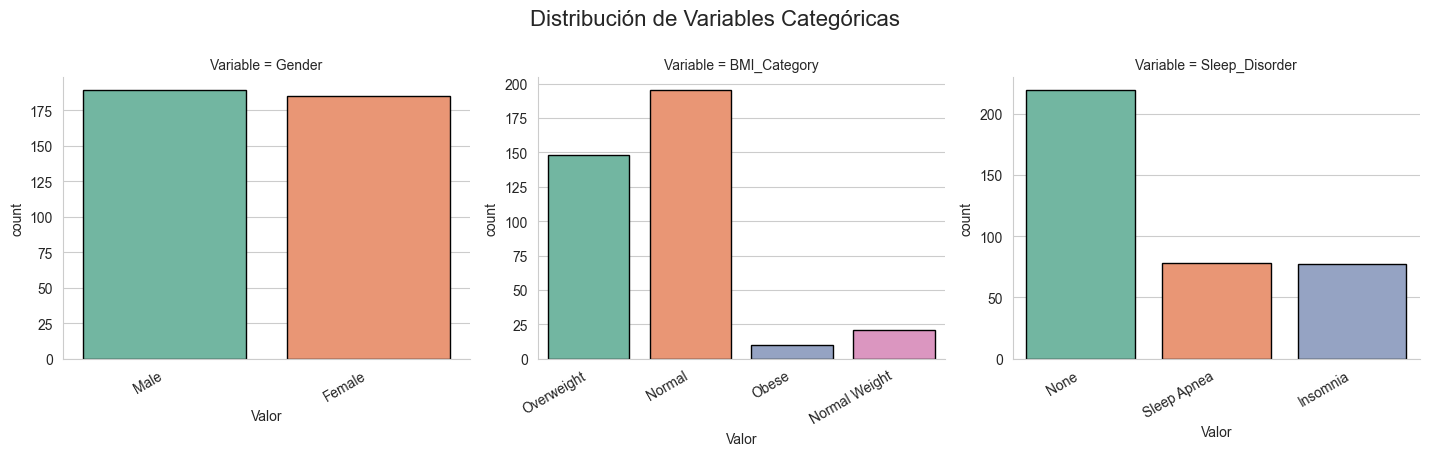

In [6]:

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning) 
# Definir variables categóricas
categorical_vars = ["Gender", "BMI_Category", "Sleep_Disorder"]

# Reestructurar datos en formato largo
data_long_cat = data_base.melt(value_vars=categorical_vars, var_name="Variable", value_name="Valor")

# Configurar estilo de los gráficos
sns.set_style("whitegrid")

# Crear gráficos de barras con facetas
g = sns.FacetGrid(data_long_cat, col="Variable", sharex=False, sharey=False, height=4, aspect=1.2)
g.map_dataframe(sns.countplot, x="Valor", palette="Set2", edgecolor="black")

# Ajustar etiquetas para evitar superposición
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

# Agregar título general
plt.subplots_adjust(top=0.85)  # Ajustar espacio para el título
g.fig.suptitle("Distribución de Variables Categóricas", fontsize=16, y=1.02)  # Ajustar posición del título

# Mostrar gráficos
plt.show()


## Análisis de variables categóricas significativas

**Interpretación**

1. **Género (Gender)**  
   - La distribución de género es equilibrada, con una cantidad similar de personas identificadas como Female (Mujer) y Male (Hombre).  
   - No parece haber sesgo de género en la muestra, ya que ambas categorías tienen casi la misma frecuencia.  

2. **Categoría de IMC (BMI Category)**  
   - La mayoría de las personas tienen un IMC normal, seguido por aquellas con sobrepeso (*Overweight*).  
   - Un menor porcentaje cae en la categoría de peso normal (*Normal Weight*) y obesidad (*Obese*).  
   - Esto sugiere que la muestra está compuesta en su mayoría por individuos con un IMC dentro de rangos normales o con cierto sobrepeso.  

3. **Trastornos del Sueño (Sleep Disorder)**  
   - La mayoría de los individuos no tienen trastorno del sueño (*None*).  
   - La segunda condición más común es insomnio (*Insomnia*), seguida de apnea del sueño (*Sleep Apnea*).  
   - Esto indica que, aunque la mayoría no tiene problemas de sueño, una parte significativa experimenta insomnio y una fracción menor sufre de apnea del sueño.  

**Conclusiones**  

- La muestra es equilibrada en cuanto al género.  
- La mayoría tiene un IMC en rango normal o con tendencia al sobrepeso.  
- Aunque la mayoría no presenta trastornos del sueño, hay una porción importante con insomnio.  




# Gráficos Variables Numéricas  

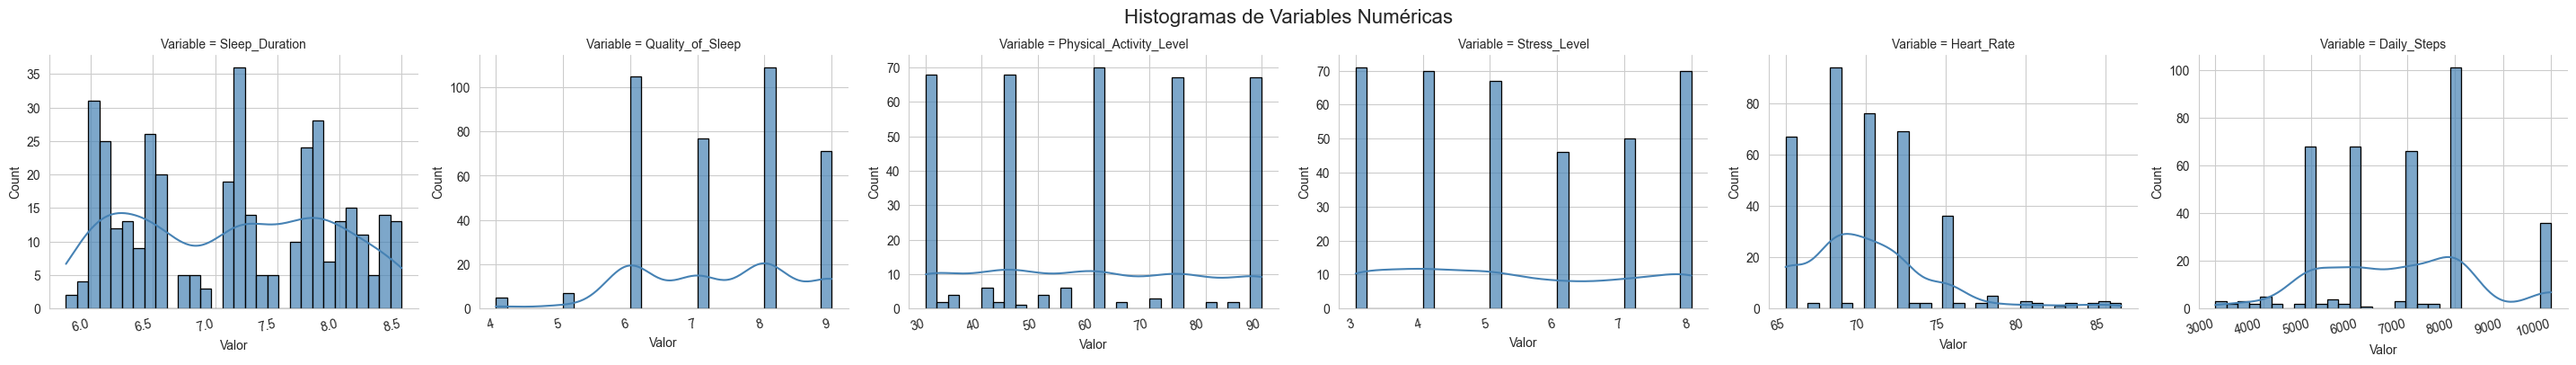

In [7]:

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Definir variables numéricas
numeric_vars = ["Sleep_Duration", "Quality_of_Sleep",
                "Physical_Activity_Level", "Stress_Level",
                "Heart_Rate", "Daily_Steps"]

# Reestructurar los datos en formato largo
data_long = data_base.melt(value_vars=numeric_vars, var_name="Variable", value_name="Valor")

# Configurar estilo de los gráficos
sns.set_style("whitegrid")

# Crear histogramas con facetas
g = sns.FacetGrid(data_long, col="Variable", sharex=False, sharey=False, height=4, aspect=1.2)
g.map_dataframe(sns.histplot, x="Valor", bins=30, kde=True, color="steelblue", edgecolor="black", alpha=0.7)

# Ajustar etiquetas para evitar superposición
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")

# Agregar título general
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Histogramas de Variables Numéricas", fontsize=16)

plt.show()


## **Interpretaciones**

1. **Sleep Duration:**  
   - Distribución multimodal, con picos alrededor de 6.5, 7 y 8 horas.  
   - Datos dispersos sin una forma claramente normal.  

2. **Quality of Sleep:**  
   - Distribución discreta con valores frecuentes en 6, 7, 8 y 9.  
   - No hay valores intermedios entre estos puntos.  

3. **Physical Activity Level:**  
   - Distribución con valores específicos repetidos (posiblemente categorías predefinidas).  
   - Picos en 40, 60 y 80.  

4. **Stress Level:**  
   - Similar a la Calidad del Sueño, con valores discretos en 3, 4, 5, 6, 7 y 8.  
   - Picos en cada uno de estos valores.  

5. **Heart Rate:**  
   - Pico alrededor de 70 bpm.  
   - Algunos valores en el rango de 75-85 bpm.  
   - Sesgo hacia la derecha debido a valores más altos.  

6. **Daily Steps:**  
   - Distribución discreta con picos en ciertos valores como 6000, 8000 y 10000 pasos.  
   - No es una distribución continua, lo que indica valores predefinidos o hábitos consistentes.  


<Figure size 1200x800 with 0 Axes>

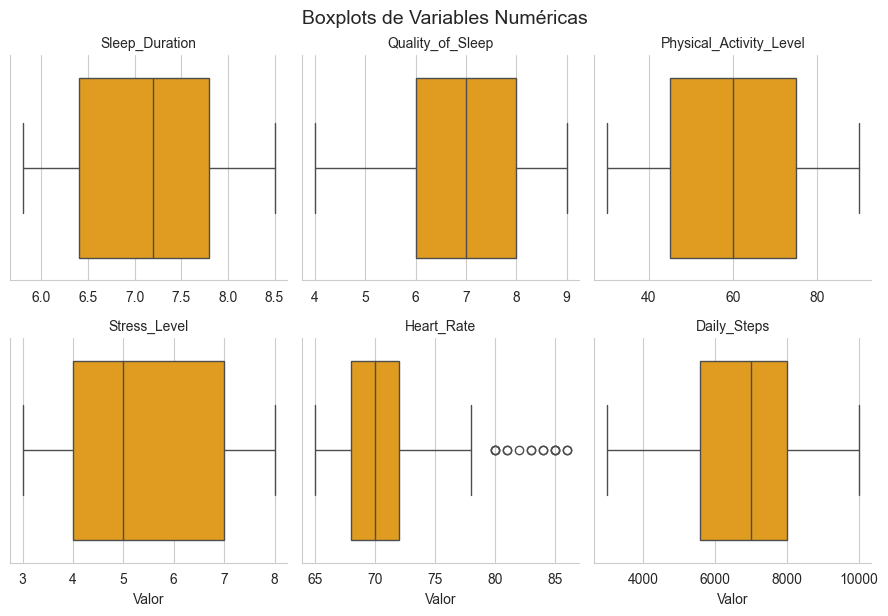

In [8]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Lista de variables numéricas
numeric_vars = ["Sleep_Duration", "Quality_of_Sleep", 
                "Physical_Activity_Level", "Stress_Level", 
                "Heart_Rate", "Daily_Steps"]

# Reestructurar los datos al formato largo
data_long = data_base.melt(value_vars=numeric_vars, var_name="Variable", value_name="Valor")

# Configurar el gráfico de boxplots
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(data_long, col="Variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "Valor", color="orange")
g.set_titles("{col_name}")
g.set_axis_labels("Valor", "")
g.fig.suptitle("Boxplots de Variables Numéricas", fontsize=14, y=1.02)

plt.show()


## Interpretaciones

1. **Sleep Duration (Duración del Sueño)**:  
   - Mediana alrededor de 7 horas.  
   - Rango intercuartil entre 6 y 8 horas.  
   - No hay valores atípicos evidentes.  

2. **Quality of Sleep (Calidad del Sueño)**:  
   - Mediana en torno a 7.  
   - Distribución similar a la duración del sueño.  
   - No hay valores atípicos.  

3. **Physical Activity Level (Nivel de Actividad Física)**:  
   - Mediana alrededor de 60.  
   - Amplio rango de variabilidad (aproximadamente de 20 a 80).  
   - No hay valores atípicos.  

4. **Stress Level (Nivel de Estrés)**:  
   - Mediana en torno a 5.  
   - Distribución relativamente simétrica.  
   - Sin valores atípicos.  

5. **Heart Rate (Frecuencia Cardiaca)**:  
   - Mediana cercana a 70 bpm.  
   - Algunos valores atípicos por encima de 80 bpm.  
   - Rango intercuartil más estrecho comparado con otras variables.  

6. **Daily Steps (Pasos Diarios)**:  
   - Mediana alrededor de 7000 pasos.  
   - Amplio rango de variabilidad (entre aproximadamente 3000 y 10000).  
   - No hay valores atípicos.  




# Relación entre variables  

## Duración del Sueño por Género

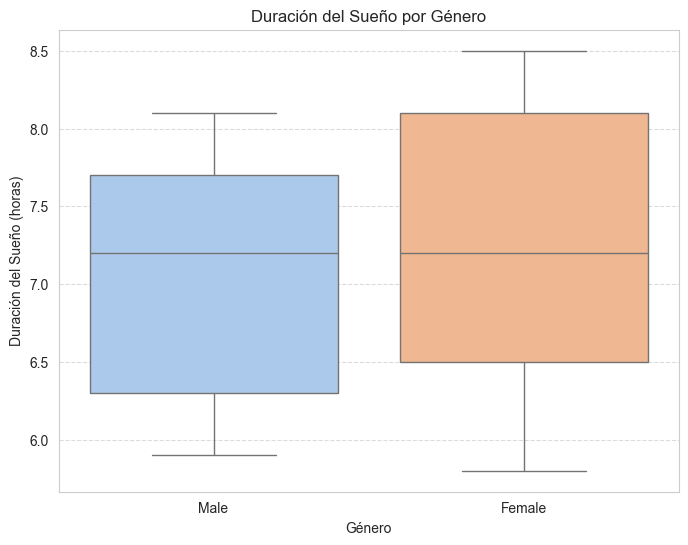

In [9]:

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Asegurar que los nombres de columnas no tengan espacios
data_base.columns = data_base.columns.str.replace(" ", "_")

# Gráfico: Relación entre Duración del Sueño y Calidad del Sueño por Género (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x="Gender", y="Sleep_Duration", data=data_base, palette="pastel")
plt.title("Duración del Sueño por Género")
plt.xlabel("Género")
plt.ylabel("Duración del Sueño (horas)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




- **Descripción:**  
  Este gráfico muestra la duración del sueño (en horas) para los géneros "Female" (Mujer) y "Male" (Hombre).

- **Análisis:**  
  - Parece que las mujeres tienen una duración de sueño ligeramente mayor que los hombres.  
  - La distribución de la duración del sueño es similar entre ambos géneros, pero las mujeres alcanzan un máximo ligeramente más alto.  

- **Conclusión:**  
  - Las diferencias en la duración del sueño entre géneros pueden ser mínimas, pero es importante considerar factores adicionales como la calidad del sueño y los trastornos asociados.  




## Nivel de Actividad Física por Categoría de BMI

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


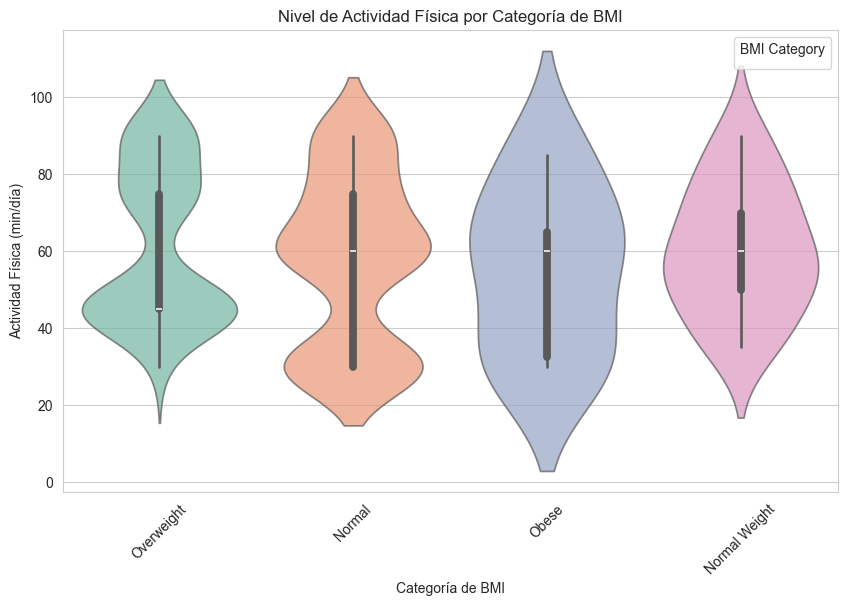

In [10]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning) 
# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_base, x="BMI_Category", y="Physical_Activity_Level", hue="BMI_Category", palette="Set2", alpha=0.7)

# Personalización
plt.title("Nivel de Actividad Física por Categoría de BMI")
plt.xlabel("Categoría de BMI")
plt.ylabel("Actividad Física (min/día)")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad
plt.legend(title="BMI Category")  # Agregar leyenda

# Mostrar gráfico
plt.show()


- **Descripción:** Este gráfico muestra el nivel de actividad física (en minutos por día) para diferentes categorías de BMI: "Normal", "Normal Weight", "Obese" y "Overweight".

- **Análisis:**  
  - Las personas con un BMI "Normal" tienden a tener un nivel de actividad física más alto.  
  - Las categorías "Obese" y "Overweight" muestran niveles de actividad física más bajos.  
  - La categoría "Normal Weight" tiene un nivel de actividad física intermedio.  

- **Conclusión:**  
  - Existe una correlación inversa entre el BMI y el nivel de actividad física: a mayor BMI, menor actividad física.  
  - Esto sugiere que el aumento de peso puede estar relacionado con un estilo de vida más sedentario.  



## Distribución de Trastornos del Sueño por Categoría de BMI

In [11]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Crear el gráfico de barras apiladas
fig = px.histogram(data_base, 
                   x='BMI_Category', 
                   color='Sleep_Disorder', 
                   barmode='stack',
                   title='Distribución de Trastornos del Sueño por Categoría de BMI',
                   labels={'BMI_Category': 'Categoría de BMI', 'Sleep_Disorder': 'Trastorno del Sueño'},
                   histnorm='percent')  # Normaliza para mostrar proporciones

# Ajustar el diseño del gráfico
fig.update_layout(
    xaxis_title='Categoría de BMI',
    yaxis_title='Proporción',
    template='plotly_white',  # Tema minimalista
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje x
    showlegend=True
)

# Mostrar el gráfico
fig.show()

## Distribución de Trastornos del Sueño por Categoría de BMI

### Descripción  
Este gráfico muestra la proporción de trastornos del sueño ("Insomnia", "None", "Sleep Apnea") en diferentes categorías de BMI.

### Análisis  
- La categoría **"Obese"** tiene una mayor proporción de trastornos del sueño, especialmente **"Sleep Apnea"**.  
- La categoría **"Normal"** tiene una mayor proporción de personas sin trastornos del sueño (**"None"**).  
- La categoría **"Overweight"** muestra una distribución intermedia, con una presencia significativa de **"Insomnia"**.  

### Conclusión  
El **BMI** está relacionado con la presencia de trastornos del sueño, especialmente en personas con **sobrepeso** y **obesidad**.  
- **La apnea del sueño** es más común en personas obesas.  
- **El insomnio** es más frecuente en personas con sobrepeso.  



# Matriz de Correlación

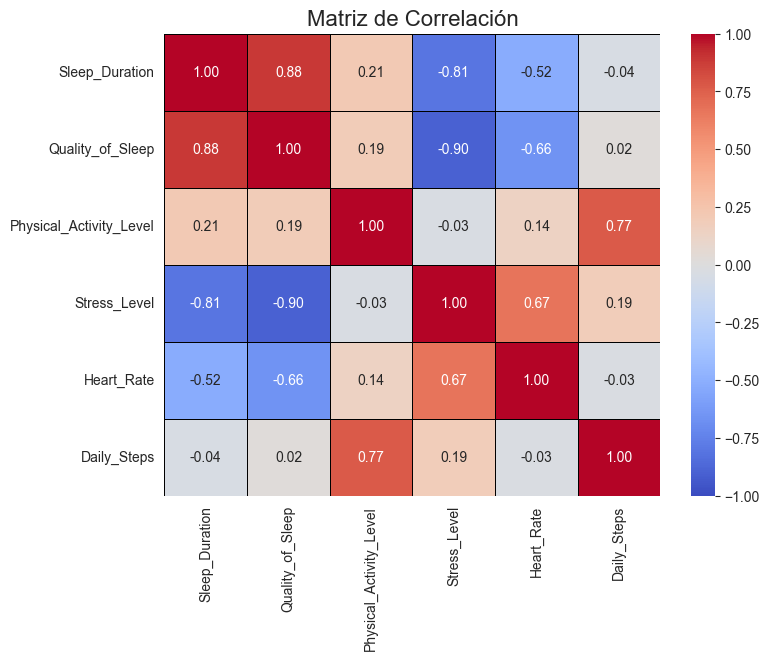

In [12]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Definir las variables numéricas
numeric_vars = ["Sleep_Duration", "Quality_of_Sleep", 
                "Physical_Activity_Level", "Stress_Level", 
                "Heart_Rate", "Daily_Steps"]

# Calcular la matriz de correlación
corr_matrix = data_base[numeric_vars].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            vmin=-1, vmax=1, linewidths=0.5, linecolor="black")

# Añadir título
plt.title("Matriz de Correlación", fontsize=16)

# Mostrar el gráfico
plt.show()

## Correlación entre Variables Numéricas

### Descripción  
Este gráfico muestra la correlación entre varias variables numéricas:  
- **Heart Rate**  
- **Stress Level**  
- **Physical Activity Level**  
- **Quality of Sleep**  
- **Sleep Duration**  

### Análisis  
- **Sleep Duration** tiene una **correlación positiva fuerte** con **Quality of Sleep** (0.88), lo que indica que una mayor duración del sueño está asociada con una mejor calidad del sueño.  
- **Stress Level** tiene una **correlación negativa moderada** con **Quality of Sleep** (-0.66), lo que sugiere que un mayor estrés está asociado con una peor calidad del sueño.  
- **Physical Activity Level** tiene una **correlación positiva débil** con **Quality of Sleep** (0.19), lo que indica que la actividad física puede tener un impacto positivo en la calidad del sueño, aunque no muy fuerte.  
- **Heart Rate** no muestra una correlación significativa con otras variables.  

### Conclusión  
- **La duración y la calidad del sueño están fuertemente relacionadas.**  
- **El estrés es un factor importante** que afecta negativamente la calidad del sueño.  
- **La actividad física puede tener un impacto positivo** en la calidad del sueño, aunque no es el factor más determinante.  

---

## Conclusiones Generales  

### 1. Género y Sueño  
- **Las mujeres** tienden a dormir **ligeramente más** que los hombres, pero las diferencias no son muy significativas.  
- Es importante investigar otros factores como la **calidad del sueño** y los **trastornos asociados** para entender mejor estas diferencias.  

### 2. BMI y Actividad Física  
- **Las personas con un BMI más alto** tienden a tener un **nivel de actividad física más bajo**.  
- Esto sugiere que el aumento de peso puede estar relacionado con un **estilo de vida más sedentario**.  

### 3. BMI y Trastornos del Sueño  
- **Las personas con sobrepeso y obesidad** tienen una **mayor prevalencia de trastornos del sueño**, especialmente **apnea del sueño e insomnio**.  
- Esto indica que el **control del peso** puede ser importante para **prevenir estos trastornos**.  

### 4. Correlaciones entre Variables  
- **La duración y la calidad del sueño están fuertemente relacionadas.**  
- **El estrés afecta negativamente la calidad del sueño.**  
- **La actividad física tiene un impacto positivo**, aunque no muy fuerte, en la calidad del sueño.  

---



# Asociación entre Variables Categóricas (Chi-Cuadrado)  

In [13]:
# Crear tabla de contingencia entre BMI Category y Sleep Disorder
table_bmi_sleep = pd.crosstab(data_base["BMI_Category"], data_base["Sleep_Disorder"])

# Prueba de Chi-Cuadrado
chi2_stat, p_value, dof, expected = stats.chi2_contingency(table_bmi_sleep)

# Resultados
print("Estadístico Chi-Cuadrado:", chi2_stat)
print("Valor p:", p_value)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)

Estadístico Chi-Cuadrado: 246.96816290222125
Valor p: 1.8229320902156188e-50
Grados de libertad: 6
Frecuencias esperadas:
 [[ 40.14705882 114.18449198  40.6684492 ]
 [  4.32352941  12.29679144   4.37967914]
 [  2.05882353   5.85561497   2.0855615 ]
 [ 30.47058824  86.6631016   30.86631016]]


## Asociación entre BMI y Trastornos del Sueño (Chi-Cuadrado)

### Resultados de la Prueba de Chi-Cuadrado:
- **Estadístico Chi-Cuadrado:** 246.97  
- **Valor p:** 1.82e-50  
- **Grados de libertad:** 6  
- **Frecuencias esperadas:**
  
  | BMI Category | None | Insomnia | Sleep Apnea |
  |-------------|------|----------|-------------|
  | Normal      | 114.18 | 40.15 | 40.67 |
  | Normal Weight | 12.30 | 4.32 | 4.38 |
  | Obese       | 5.86 | 2.06 | 2.09 |
  | Overweight  | 86.66 | 30.47 | 30.87 |

### Análisis:
1. **El valor p es extremadamente bajo (1.82e-50), lo que indica que hay una asociación significativa entre la categoría de BMI y la presencia de trastornos del sueño.**  
2. **Las frecuencias observadas y esperadas sugieren que ciertos trastornos del sueño son más comunes en categorías específicas de BMI:**  
   - **Las personas con obesidad tienen una mayor prevalencia de apnea del sueño en comparación con lo esperado.**  
   - **Las personas con peso normal tienen una mayor proporción de individuos sin trastornos del sueño.**  
   - **El insomnio es más frecuente en individuos con sobrepeso en comparación con otras categorías.**  
3. **La relación entre el BMI y los trastornos del sueño refuerza la importancia del control del peso para la prevención de problemas del sueño.**

### Conclusión:
El análisis de Chi-Cuadrado confirma una asociación estadísticamente significativa entre el índice de masa corporal (BMI) y los trastornos del sueño. La obesidad está particularmente vinculada con la apnea del sueño, mientras que el insomnio se observa con mayor frecuencia en personas con sobrepeso. Esto sugiere que mantener un peso saludable puede ser un factor clave en la prevención de trastornos del sueño.


# Resumen estadístico entre variables

In [14]:

# Resumen estadístico de variables numéricas por Género
summary_by_gender = data_base.groupby("Gender").agg(
    Avg_Sleep_Duration=('Sleep_Duration', 'mean'),
    Median_Sleep_Duration=('Sleep_Duration', 'median'),
    SD_Sleep_Duration=('Sleep_Duration', 'std'),
    Min_Sleep_Duration=('Sleep_Duration', 'min'),
    Max_Sleep_Duration=('Sleep_Duration', 'max'),
    
    Avg_Quality_of_Sleep=('Quality_of_Sleep', 'mean'),
    Median_Quality_of_Sleep=('Quality_of_Sleep', 'median'),
    SD_Quality_of_Sleep=('Quality_of_Sleep', 'std'),
    Min_Quality_of_Sleep=('Quality_of_Sleep', 'min'),
    Max_Quality_of_Sleep=('Quality_of_Sleep', 'max'),
    
    Avg_Physical_Activity=('Physical_Activity_Level', 'mean'),
    Median_Physical_Activity=('Physical_Activity_Level', 'median'),
    SD_Physical_Activity=('Physical_Activity_Level', 'std'),
    Min_Physical_Activity=('Physical_Activity_Level', 'min'),
    Max_Physical_Activity=('Physical_Activity_Level', 'max'),
    
    Avg_Stress_Level=('Stress_Level', 'mean'),
    Median_Stress_Level=('Stress_Level', 'median'),
    SD_Stress_Level=('Stress_Level', 'std'),
    Min_Stress_Level=('Stress_Level', 'min'),
    Max_Stress_Level=('Stress_Level', 'max')
)

# Resumen estadístico de variables numéricas por Categoría de BMI
summary_by_bmi = data_base.groupby("BMI_Category").agg(
    Avg_Sleep_Duration=('Sleep_Duration', 'mean'),
    Median_Sleep_Duration=('Sleep_Duration', 'median'),
    SD_Sleep_Duration=('Sleep_Duration', 'std'),
    Min_Sleep_Duration=('Sleep_Duration', 'min'),
    Max_Sleep_Duration=('Sleep_Duration', 'max'),
    
    Avg_Quality_of_Sleep=('Quality_of_Sleep', 'mean'),
    Median_Quality_of_Sleep=('Quality_of_Sleep', 'median'),
    SD_Quality_of_Sleep=('Quality_of_Sleep', 'std'),
    Min_Quality_of_Sleep=('Quality_of_Sleep', 'min'),
    Max_Quality_of_Sleep=('Quality_of_Sleep', 'max'),
    
    Avg_Physical_Activity=('Physical_Activity_Level', 'mean'),
    Median_Physical_Activity=('Physical_Activity_Level', 'median'),
    SD_Physical_Activity=('Physical_Activity_Level', 'std'),
    Min_Physical_Activity=('Physical_Activity_Level', 'min'),
    Max_Physical_Activity=('Physical_Activity_Level', 'max'),
    
    Avg_Stress_Level=('Stress_Level', 'mean'),
    Median_Stress_Level=('Stress_Level', 'median'),
    SD_Stress_Level=('Stress_Level', 'std'),
    Min_Stress_Level=('Stress_Level', 'min'),
    Max_Stress_Level=('Stress_Level', 'max')
)

# Mostrar tablas
print("Resumen estadístico por Género:")
print(summary_by_gender)

print("\nResumen estadístico por Categoría de BMI:")
print(summary_by_bmi)


Resumen estadístico por Género:
        Avg_Sleep_Duration  Median_Sleep_Duration  SD_Sleep_Duration  Min_Sleep_Duration  Max_Sleep_Duration  Avg_Quality_of_Sleep  Median_Quality_of_Sleep  SD_Quality_of_Sleep  \
Gender                                                                                                                                                                             
Female            7.229730                    7.2           0.879434                 5.8                 8.5              7.664865                      8.0             1.279482   
Male              7.036508                    7.2           0.693197                 5.9                 8.1              6.968254                      7.0             0.999493   

        Min_Quality_of_Sleep  Max_Quality_of_Sleep  Avg_Physical_Activity  Median_Physical_Activity  SD_Physical_Activity  Min_Physical_Activity  Max_Physical_Activity  Avg_Stress_Level  \
Gender                                                    

# **Análisis y Conclusiones**  

## **Análisis por Género**  

### **Duración del Sueño:**  
- Las mujeres duermen en promedio **7.23 horas**, mientras que los hombres duermen **7.04 horas**.  
- La dispersión del sueño es mayor en mujeres (**desviación estándar de 0.88 vs. 0.69 en hombres**).  
- La mínima duración del sueño es menor en hombres (**5.9 h vs. 5.8 h en mujeres**).  

### **Calidad del Sueño:**  
- Las mujeres reportan una mejor calidad del sueño en promedio (**7.66 vs. 6.97 en hombres**).  
- La variabilidad de la calidad del sueño es mayor en mujeres.  
- Tanto hombres como mujeres tienen la misma calidad de sueño mínima (**4**) y máxima (**9**).  

### **Nivel de Actividad Física:**  
- No hay una diferencia significativa entre géneros en la actividad física promedio (**~59**).  
- La dispersión es similar en ambos grupos (**~21**).  

### **Nivel de Estrés:**  
- Los hombres tienen un nivel de estrés significativamente mayor (**6.08 vs. 4.67 en mujeres**).  
- La mediana del estrés es **6 en hombres y 4 en mujeres**, lo que confirma la diferencia.  
- La variabilidad del estrés es mayor en mujeres (**1.91 vs. 1.30 en hombres**).  

---

## **Análisis por Categoría de BMI**  

### **Duración del Sueño:**  
- Las personas con **BMI normal** duermen más (**7.39 h**) y las con **sobrepeso** duermen menos (**6.77 h**).  
- La desviación estándar es mayor en personas obesas, lo que indica mayor variabilidad.  

### **Calidad del Sueño:**  
- La calidad del sueño disminuye con el aumento del BMI:  
  - **Normal:** **7.66**  
  - **Normal Weight:** **7.42**  
  - **Overweight:** **6.89**  
  - **Obese:** **6.40**  
- Las personas con obesidad tienen la mayor variabilidad en calidad del sueño.  

### **Nivel de Actividad Física:**  
- Disminuye con el aumento del BMI, con la categoría **obesa teniendo el nivel más bajo (~51)**.  
- Las personas con **BMI normal tienen mayor actividad (~66)**.  

### **Nivel de Estrés:**  
- A mayor BMI, mayor estrés:  
  - **Normal:** **5.37**  
  - **Normal Weight:** **5.33**  
  - **Overweight:** **5.94**  
  - **Obese:** **6.40**  
- La mayor variabilidad en el estrés se encuentra en personas con **sobrepeso y obesidad**.  

---

## **Conclusiones Generales**  

1. **Género y Sueño:**  
   - Las mujeres duermen más y tienen mejor calidad de sueño.  
   - Los hombres reportan niveles de estrés más altos, lo que puede afectar la calidad del sueño.  

2. **BMI y Sueño:**  
   - Las personas con BMI normal tienen **mejor calidad y duración del sueño**.  
   - El sueño se deteriora con el aumento del BMI, especialmente en **personas obesas**.  

3. **Actividad Física y Estrés:**  
   - A mayor BMI, **menor actividad física y mayor estrés**.  
   - La actividad física podría ser un factor clave para **mejorar el sueño y reducir el estrés**.  

4. **Impacto del Estrés:**  
   - Las personas con **altos niveles de estrés tienen peor calidad del sueño**.  
   - La **gestión del estrés** podría mejorar significativamente el descanso y la salud general.  



# Valores faltantes


In [15]:
# Contar valores NA en cada columna
na_count = data_base.isna().sum()

print("Cantidad de valores NA por columna:")
print(na_count)

Cantidad de valores NA por columna:
Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64



**Análisis**

No hay valores NA en ninguna columna, lo que indica que los datos están completos y no requieren imputación.


# Normalidad 

In [16]:
# Lista de variables numéricas
numeric_vars = data_base.select_dtypes(include=['number']).columns  

# Aplicar la prueba de Shapiro-Wilk a cada variable numérica
shapiro_results = {var: shapiro(data_base[var].dropna()).pvalue for var in numeric_vars}

# Convertir resultados a DataFrame
shapiro_results_df = pd.DataFrame(list(shapiro_results.items()), columns=["Variable", "P_value"])

# Mostrar resultados
print(shapiro_results_df)

                  Variable       P_value
0                Person_ID  2.548943e-09
1                      Age  7.421343e-09
2           Sleep_Duration  1.266872e-11
3         Quality_of_Sleep  1.882132e-15
4  Physical_Activity_Level  5.178644e-15
5             Stress_Level  1.112158e-15
6               Heart_Rate  2.684890e-16
7              Daily_Steps  1.654560e-11


## Prueba de Normalidad (Shapiro-Wilk)

### Descripción:
Se realizó la prueba de normalidad de **Shapiro-Wilk** para evaluar si las variables numéricas siguen una distribución normal. El valor p (`P_value`) indica si podemos aceptar la hipótesis nula (los datos siguen una distribución normal).

### Análisis:
Los resultados muestran valores p extremadamente pequeños para todas las variables (muy por debajo de 0.05), lo que sugiere que ninguna de ellas sigue una distribución normal. En particular:
- **Sleep_Duration**, **Quality_of_Sleep**, **Physical_Activity_Level**, **Stress_Level**, **Heart_Rate** y **Daily_Steps** presentan una desviación significativa de la normalidad.
- La variable **Person_ID** no es relevante para la normalidad, ya que representa identificadores únicos.

### Conclusión:
Dado que todas las variables presentan una distribución **no normal**, se recomienda el uso de **pruebas no paramétricas** para análisis posteriores (como U de Mann-Whitney, Kruskal-Wallis o correlaciones de Spearman), en lugar de pruebas paramétricas que asumen normalidad (como t-test o ANOVA).


## MODELO MACHINE LEARNING

## Problema propuesto 

**Predicción y clasificación de trastornos del sueño basados en factores de estilo de vida y salud** 

 Claramente hay correlaciones entre variables como estrés, actividad física, IMC y calidad del sueño. Un problema valioso sería desarrollar un modelo predictivo que pueda:

**Predecir la presencia de trastornos del sueño (None, Insomnia, Sleep Apnea) basándose en los factores de estilo de vida.**

Identificar los factores más determinantes para cada tipo de trastorno.

Proporcionar recomendaciones personalizadas basadas en perfiles de riesgo.

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, f1_score
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

#  visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
colors = plt.cm.tab10.colors

### Cargar base de datos 


In [18]:

# Cargar datos
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Mostrar primeras filas 
print("Vista previa de los datos:")
display(data.head())

# Limpiar nombres de columnas (quitar espacios)
data.columns = [col.replace(' ', '_') for col in data.columns]



Vista previa de los datos:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Procesamiento 

In [19]:

# Preprocesamiento básico
data['Sleep_Disorder'] = data['Sleep_Disorder'].fillna('None')

# Verificar distribución de clases
print("\nDistribución de clases (Sleep_Disorder):")
class_counts = data['Sleep_Disorder'].value_counts()
display(class_counts)
print(f"Proporción de la clase minoritaria: {class_counts.min()/class_counts.sum():.4f}")



Distribución de clases (Sleep_Disorder):


Sleep_Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Proporción de la clase minoritaria: 0.2059


Los datos muestran una distribución de trastornos del sueño entre los 374 individuos:

1. 219 personas (58.6%) no presentan trastornos del sueño

2. 78 personas (20.9%) tienen apnea del sueño

3. 77 personas (20.5%) sufren de insomnio

Esta distribución indica que aproximadamente el 41.4% de la población estudiada presenta algún trastorno del sueño, lo que refleja la relevancia clínica de estos problemas.

## Preparacion y Analisis de las Distribuciones

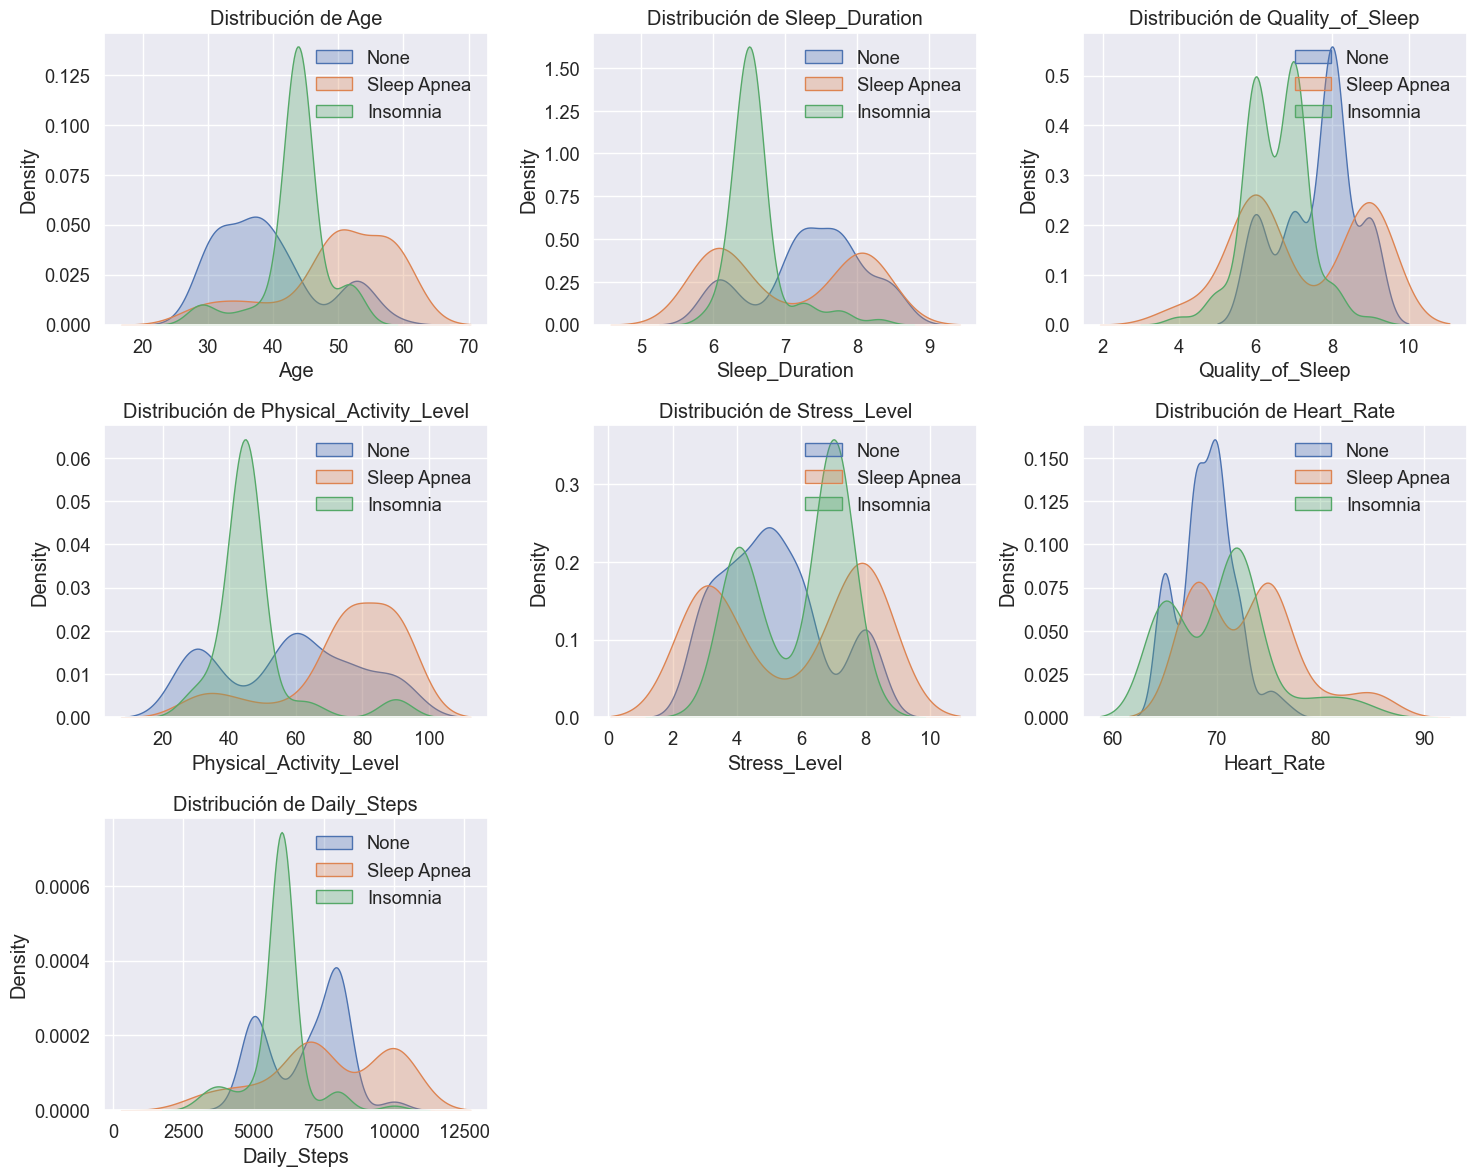

In [20]:

# Seleccion de variables características y objetivo
X = data.drop(['Sleep_Disorder', 'Person_ID', 'Occupation', 'Blood_Pressure'], axis=1)
y = data['Sleep_Disorder']

# Definir columnas por tipo
numeric_features = ['Age', 'Sleep_Duration', 'Quality_of_Sleep', 
                    'Physical_Activity_Level', 'Stress_Level', 
                    'Heart_Rate', 'Daily_Steps']
                    
categorical_features = ['Gender', 'BMI_Category']

# Visualizar distribuciones de variables numéricas por clase
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    for disorder in data['Sleep_Disorder'].unique():
        sns.kdeplot(data[data['Sleep_Disorder'] == disorder][feature], 
                   label=disorder, shade=True, alpha=0.3)
    plt.title(f'Distribución de {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

## Análisis de Distribuciones
Las distribuciones de variables clave por tipo de trastorno:

**Edad** : Las personas con apnea del sueño tienden a ser mayores (50-60 años), mientras que quienes sufren insomnio son más jóvenes (40-45 años)

**Duración del sueño**: Las personas con insomnio muestran menor duración del sueño (≈6 horas), mientras que sin trastornos duermen más (≈7-8 horas)

**Calidad del sueño:** Personas sin trastornos muestran mejor calidad (8-9/10), mientras que con trastornos muestran menor calidad (4-6/10)

**Actividad física** : Los pacientes con apnea del sueño muestran mayor nivel (≈80-100 min/día) que los de insomnio (≈40 min/día)

**Nivel de estrés** : Personas con insomnio muestran niveles más altos (≈7-8/10)

## Preparacion para el Modelo

In [21]:

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                   random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

Tamaño del conjunto de entrenamiento: (280, 9)
Tamaño del conjunto de prueba: (94, 9)



## Entrenamiento Del Modelo Random Forest


Random Forest es un modelo de ensamblaje basado en árboles de decisión. Su objetivo es reducir el sobreajuste y aumentar la precisión al combinar múltiples árboles entrenados sobre subconjuntos aleatorios de datos.

### Fórmula general:
Sea \( h_1(x), h_2(x), ..., h_T(x) \) los clasificadores generados por cada árbol, la predicción del modelo es:

\[
\hat{y} = \text{mode}(h_1(x), h_2(x), ..., h_T(x))
\]

donde `mode` representa el voto mayoritario entre todos los árboles.

Este método introduce aleatoriedad tanto en los datos como en las características seleccionadas en cada división.


### Métrica principal seleccionada: Recall ponderado (Weighted Recall)

En este proyecto, se busca identificar correctamente a las personas que presentan **trastornos del sueño**. Por tanto, es fundamental minimizar los **falsos negativos**, es decir, evitar que un paciente con Insomnio o Apnea del Sueño no sea detectado.

Por esta razón, se seleccionó **Recall ponderado** como métrica principal de evaluación. Esta métrica refleja la capacidad del modelo para capturar correctamente los casos positivos en todas las clases, ponderando según su frecuencia. Es especialmente relevante en contextos de salud, donde no identificar un caso puede tener consecuencias importantes.

La validación del modelo se realizó mediante **validación cruzada estratificada (Stratified K-Fold)**, que divide los datos en 5 grupos manteniendo la proporción de clases. Esto garantiza una evaluación justa y representativa del desempeño del modelo.


In [22]:
# MODELO: Random Forest con balanceo de clases
print("\nMODELO: RANDOM FOREST CON BALANCEO INTERNO")

rf_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('balancer', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, 
                                          max_depth=10,
                                          min_samples_split=5,
                                          random_state=42))
])

# Entrenamiento
rf_model.fit(X_train, y_train)

# Predicción y métrica principal en test
y_pred = rf_model.predict(X_test)
from sklearn.metrics import recall_score
recall_test = recall_score(y_test, y_pred, average='weighted')
print(f"Recall ponderado en test: {recall_test:.4f}")

# Validación cruzada (recall ponderado)
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='recall_weighted')
print(f"Validación cruzada (Recall ponderado): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



MODELO: RANDOM FOREST CON BALANCEO INTERNO
Recall ponderado en test: 0.9255
Validación cruzada (Recall ponderado): 0.8930 ± 0.0359


**Recall ponderado en test: 0.9255**

Esto significa que el modelo logró identificar correctamente el 92.55% de los casos de trastorno del sueño, ponderando por la proporción de cada clase. Es un rendimiento muy alto, lo que indica que el modelo está capturando bien tanto los casos de Insomnia como de Sleep Apnea, sin favorecer únicamente a la clase más común.


**Validación cruzada (Recall ponderado): 0.8930 ± 0.0359**

El promedio del recall ponderado a lo largo de 5 particiones de los datos fue de 89.30%, con una desviación estándar de 3.59%. Esto indica que el modelo mantiene un rendimiento estable en diferentes subconjuntos de datos, lo cual reduce la probabilidad de sobreajuste y demuestra que el modelo es generalizable.

### Comparación Train vs Test para overfitting

In [23]:
# Comparación de desempeño para evaluar overfitting
from sklearn.metrics import recall_score, f1_score

# Predicciones sobre el set de entrenamiento
y_train_pred = rf_model.predict(X_train)

# Métricas en entrenamiento
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# Predicciones sobre el set de prueba
y_test_pred = rf_model.predict(X_test)

# Métricas en prueba
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Mostrar comparación
print("\nEvaluación de Overfitting:")
print(f"Recall ponderado - Train: {recall_train:.4f}")
print(f"Recall ponderado - Test:  {recall_test:.4f}")
print(f"F1 ponderado - Train:     {f1_train:.4f}")
print(f"F1 ponderado - Test:      {f1_test:.4f}")



Evaluación de Overfitting:
Recall ponderado - Train: 0.9179
Recall ponderado - Test:  0.9255
F1 ponderado - Train:     0.9173
F1 ponderado - Test:      0.9276


### Evaluación de Overfitting

Se compararon las métricas de desempeño entre el conjunto de entrenamiento y el conjunto de prueba para detectar posibles signos de sobreajuste (overfitting). 

Los resultados fueron los siguientes:

- **Recall ponderado (Train):** 0.9179  
- **Recall ponderado (Test):** 0.9255  
- **F1 ponderado (Train):** 0.9173  
- **F1 ponderado (Test):** 0.9276  

Dado que los valores en ambos conjuntos son **muy similares** e incluso ligeramente superiores en el conjunto de prueba, se concluye que el modelo **no presenta overfitting**.  
Esto indica una **buena capacidad de generalización**, lo cual es crucial al aplicar el modelo a nuevos datos.


## Evaluacion del Modelo 


Informe de clasificación:
              precision    recall  f1-score   support

    Insomnia       0.89      0.89      0.89        19
        None       1.00      0.93      0.96        55
 Sleep Apnea       0.79      0.95      0.86        20

    accuracy                           0.93        94
   macro avg       0.90      0.92      0.91        94
weighted avg       0.93      0.93      0.93        94

Balanced accuracy: 0.9240
Macro F1 score: 0.9069
Recall ponderado: 0.9255


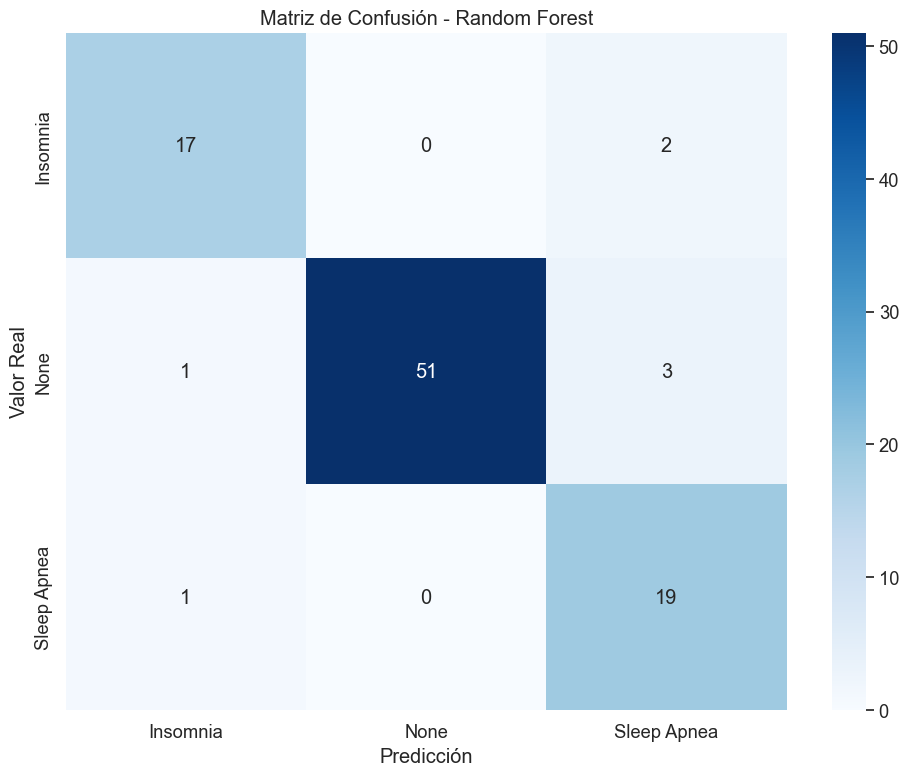

In [24]:
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    balanced_accuracy_score, 
    f1_score, 
    recall_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Predicciones
y_pred = rf_model.predict(X_test)

# Evaluación detallada
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))
print(f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print(f"Macro F1 score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall ponderado: {recall_score(y_test, y_pred, average='weighted'):.4f}")

# Guardar métricas para mostrar luego en tabla
metrics_rf = {
    'Recall ponderado': recall_score(y_test, y_pred, average='weighted'),
    'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
    'F1 Macro': f1_score(y_test, y_pred, average='macro')
}

# Visualizar como tabla
pd.DataFrame(metrics_rf, index=['Random Forest']).T

# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_model.classes_, 
            yticklabels=rf_model.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.tight_layout()
plt.show()


### Evaluación del Modelo: Random Forest

El modelo de Random Forest fue evaluado usando múltiples métricas con enfoque en problemas multiclase y desbalanceados. Se obtuvo el siguiente desempeño:

- **Recall ponderado (0.9255):** esta métrica fue priorizada dado que nos interesa minimizar los falsos negativos en cada categoría, especialmente para no omitir pacientes con trastornos como Insomnio o Apnea del Sueño.
- **Balanced Accuracy (0.9240):** útil en contextos de desbalance, ya que promedia el recall por clase, compensando la predominancia de la clase 'None'.
- **F1 Macro (0.9069):** ofrece una medida equilibrada entre precisión y recall para cada clase, permitiendo comparar el rendimiento global.

**Informe de Clasificación:**

- **Insomnia:** Recall de 0.89 y F1-score de 0.89 → el modelo tiene buen desempeño identificando correctamente esta clase.
- **None:** Recall de 0.93 → identifica muy bien a los pacientes sin trastornos, aunque hubo 4 falsos positivos (3 Sleep Apnea, 1 Insomnia).
- **Sleep Apnea:** Recall de 0.95, aunque con menor precisión (0.79), indicando que algunos pacientes fueron mal clasificados como apnea.

**Conclusión:** El modelo logra una excelente capacidad de generalización, como lo demuestran las métricas similares entre entrenamiento y prueba. El análisis de overfitting mostró un recall ponderado de 0.9179 en entrenamiento y 0.9255 en prueba, lo que indica un ajuste balanceado. Dado el enfoque clínico del problema, se priorizó el recall ponderado para evitar falsos negativos, y el modelo respondió adecuadamente a esta necesidad. La matriz de confusión refuerza esto, mostrando pocos errores graves de clasificación. El recall ponderado alto es fundamental para un problema sensible como este, en el que dejar pasar un trastorno sin detectar puede tener consecuencias clínicas relevantes.



## Analisis de Importancia de Caracteristicas 

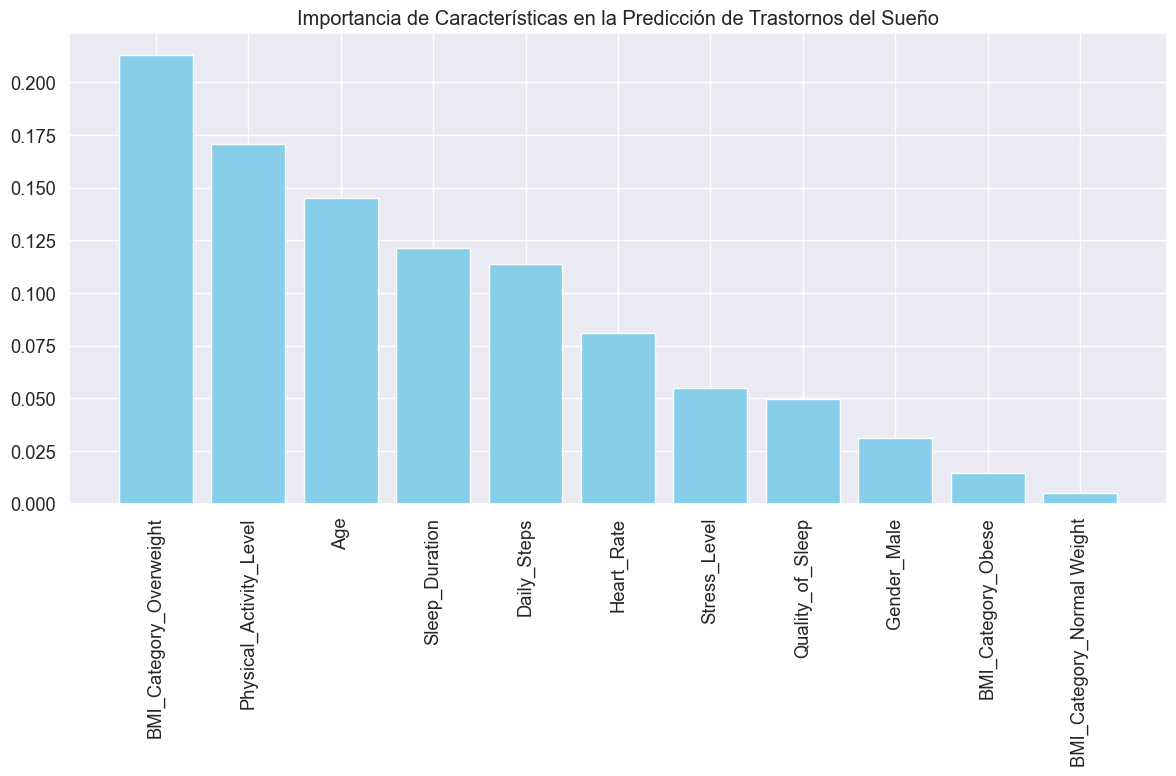

In [25]:
# Extraer componentes del pipeline para análisis
rf_classifier = rf_model.named_steps['classifier']
X_train_preprocessed = rf_model.named_steps['preprocessor'].transform(X_train)
X_train_resampled, y_train_resampled = rf_model.named_steps['balancer'].fit_resample(X_train_preprocessed, y_train)

# Obtener nombres de características después de la transformación
cat_features = rf_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_features)

# Calcular y visualizar importancia de características (método integrado)
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Importancia de Características en la Predicción de Trastornos del Sueño')
plt.bar(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

## Factores Predictivos de Trastornos del Sueño
La importancia de características revela que los principales factores predictivos son:

**BMI_Category_Overweight** : El sobrepeso aparece como el factor más importante (0.21)

**Physical_Activity_Level** : El nivel de actividad física es el segundo factor (0.17)

**Age** : La edad es el tercer factor más importante (0.14)

**Sleep_Duration** : La duración del sueño (0.12)

**Daily_Steps**: Los pasos diarios (0.11)

Esto sugiere que el manejo del peso y el nivel de actividad física son cruciales para prevenir trastornos del sueño.

## Evaluacion del Modelo

In [26]:
### Preparación para Curvas ROC y Análisis Multiclase

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# probabilidades para el conjunto de prueba
y_pred_proba = rf_model.predict_proba(X_test)

# etiquetas binarizadas para curvas ROC multiclase
y_test_bin = label_binarize(y_test, classes=rf_model.classes_)
n_classes = y_test_bin.shape[1]

# DataFrame para comparación
results_df = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_pred
})

# Mostrar una muestra aleatoria de resultados
print("Muestra de predicciones vs valores reales:")
display(results_df.sample(10))

Muestra de predicciones vs valores reales:


,Real,Predicción
36,None,None
62,None,None
198,Insomnia,Insomnia
107,None,None
268,Sleep Apnea,Sleep Apnea
264,Insomnia,Insomnia
30,Sleep Apnea,Insomnia
365,Sleep Apnea,Sleep Apnea
35,None,None
221,Insomnia,Insomnia


## Curvas ROC para las Clases

A continuación se grafican las curvas ROC para cada clase (Insomnia, Sleep Apnea y None), evaluando la capacidad del modelo para distinguir entre las categorías de trastornos. El área bajo la curva (AUC) se reporta para cada clase.


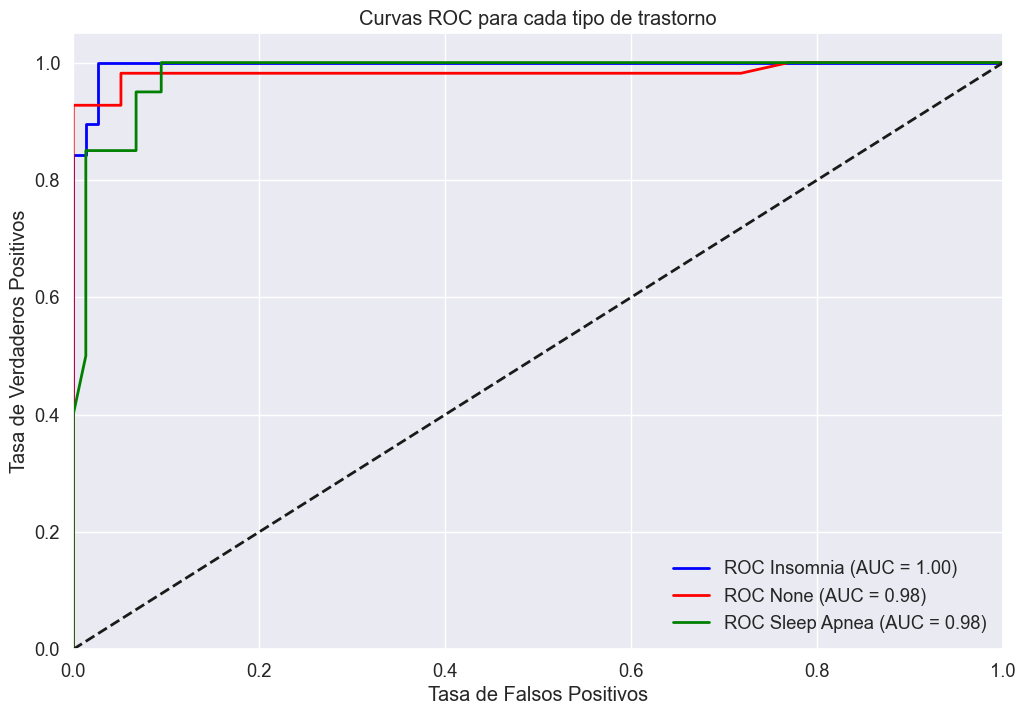

In [27]:
#  curvas ROC para cada clase
plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color, cls in zip(range(n_classes), colors, rf_model.classes_):
    # Calcular ROC
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Graficar para cada clase
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'ROC {cls} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para cada tipo de trastorno')
plt.legend(loc="lower right")
plt.show()

## Curvas Precision-Recall


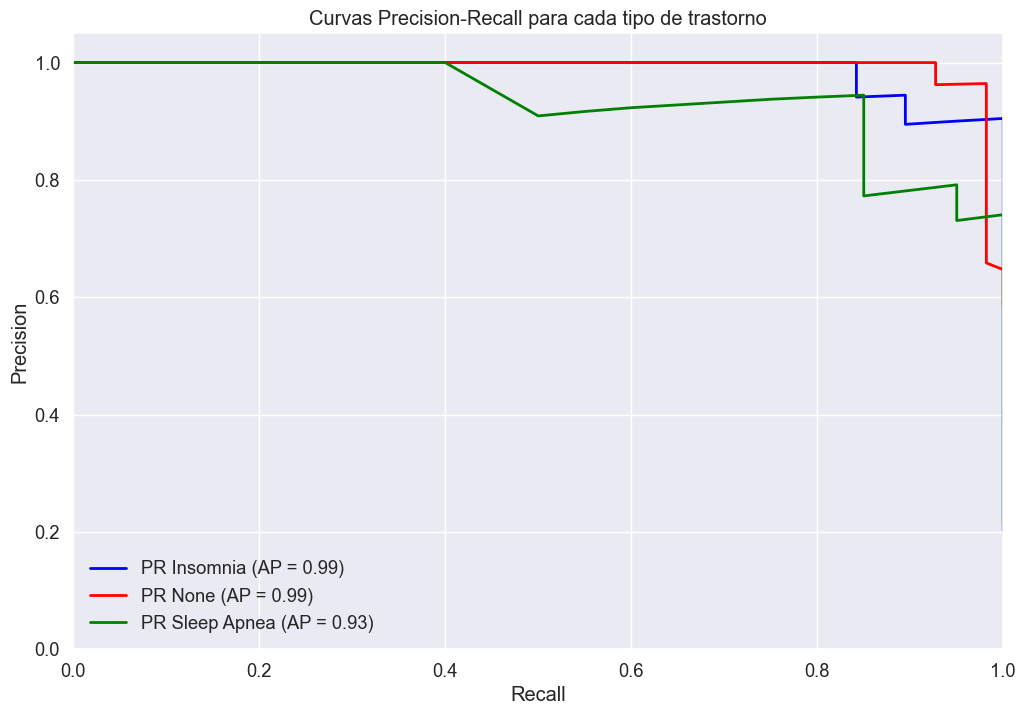

In [28]:

plt.figure(figsize=(12, 8))
for i, color, cls in zip(range(n_classes), colors, rf_model.classes_):
    # Calcular Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_proba[:, i])
    
    # Graficar para cada clase
    plt.plot(recall, precision, color=color, lw=2,
             label=f'PR {cls} (AP = {avg_precision:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall para cada tipo de trastorno')
plt.legend(loc="lower left")
plt.show()

## Evaluación del Rendimiento Predictivo
Las curvas ROC y Precision-Recall reflejan un excelente desempeño del modelo Random Forest en todas las clases. En especial:

La clase **Insomnio** logra resultados casi perfectos, lo cual es valioso clínicamente por el riesgo de subdiagnóstico.

La clase **Apnea** del Sueño también presenta alta discriminación (AUC = 0.98, AP = 0.93), aunque con ligera pérdida de precisión comparada con el recall, lo que puede estar relacionado con el desbalance.

La clase **None** mantiene alta precisión y especificidad, importante para evitar falsos positivos.

## Analisis de Predicciones Incorrectas

In [29]:
# Identificar predicciones incorrectas
incorrect_predictions = results_df[results_df['Real'] != results_df['Predicción']]
print(f"\nTotal de predicciones incorrectas: {len(incorrect_predictions)} de {len(results_df)} ({len(incorrect_predictions)/len(results_df):.1%})")

# Usar máscaras booleanas para obtener muestras correctas e incorrectas
incorrect_mask = y_test != y_pred
incorrect_X = X_test[incorrect_mask]
correct_X = X_test[~incorrect_mask]

# Verificar que no estén vacíos
print(f"Predicciones incorrectas: {len(incorrect_X)}")
print(f"Predicciones correctas: {len(correct_X)}")


Total de predicciones incorrectas: 7 de 94 (7.4%)
Predicciones incorrectas: 7
Predicciones correctas: 87


## Visualizacion en Espacio PCA

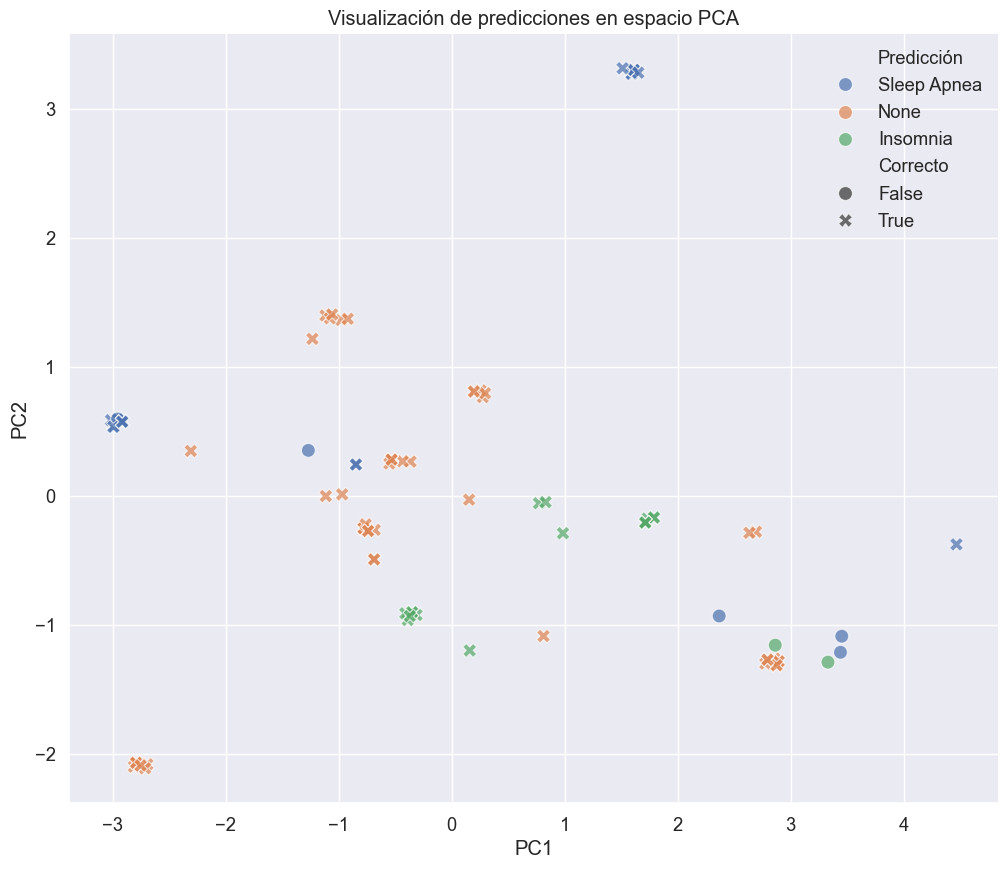

In [30]:
from sklearn.decomposition import PCA

# Aplicar PCA para visualización en 2D
pca = PCA(n_components=2)
X_test_preprocessed = rf_model.named_steps['preprocessor'].transform(X_test)
X_test_pca = pca.fit_transform(X_test_preprocessed)

# Crear DataFrame para visualización
pca_df = pd.DataFrame({
    'PC1': X_test_pca[:, 0],
    'PC2': X_test_pca[:, 1],
    'Real': y_test,
    'Predicción': y_pred,
    'Correcto': y_test == y_pred
})

# Graficar en espacio PCA
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, 
               hue='Predicción', style='Correcto', s=100, alpha=0.7)
plt.title('Visualización de predicciones en espacio PCA')
plt.show()

La proyección del conjunto de prueba sobre los dos primeros componentes principales (PCA) permite visualizar la distribución de las observaciones en un espacio reducido de 2 dimensiones, facilitando la evaluación visual del comportamiento del modelo.

En el gráfico:

- Cada punto representa una instancia del conjunto de prueba.
- El **color** indica la clase **predicha** por el modelo (`None`, `Insomnia`, `Sleep Apnea`).
- La **forma** del punto distingue si la predicción fue correcta (`✔️`) o incorrecta (`✖️`).

#### Interpretación:
- Se observan **grupos bien definidos** en el espacio PCA, lo cual indica que el modelo logró capturar estructuras discriminativas entre clases.
- La mayoría de los puntos están correctamente clasificados (predicción = real), lo que concuerda con el bajo porcentaje de errores observado (solo 7.4% de predicciones incorrectas).
- Las pocas instancias mal clasificadas aparecen aisladas o en zonas de frontera entre clases, lo cual es esperable en problemas multiclase con cierto traslape.

Esta visualización complementa las métricas cuantitativas al permitir validar gráficamente la capacidad de generalización del modelo y detectar regiones donde podría haber ambigüedad entre clases.


### Distribución de Probabilidades por Clase

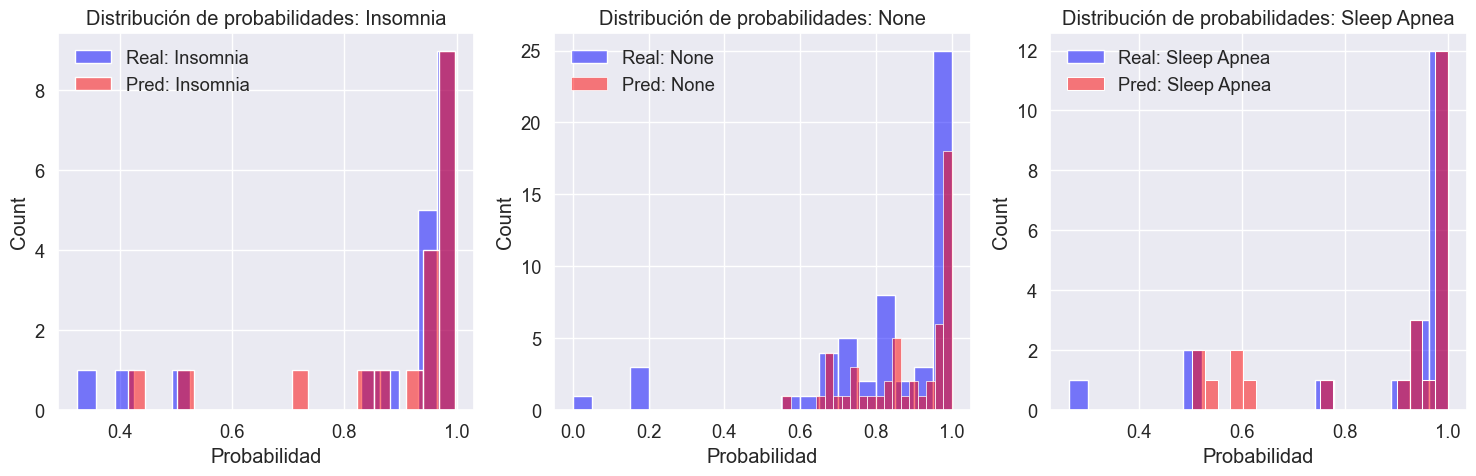

In [31]:
# probabilidades para cada clase
plt.figure(figsize=(15, 5))
for i, cls in enumerate(rf_model.classes_):
    plt.subplot(1, 3, i+1)
    
    # Histograma de probabilidades
    probs = y_pred_proba[:, i]
    correct = (y_pred == y_test) & (y_pred == cls)
    
    sns.histplot(probs[y_test == cls], color='blue', alpha=0.5, bins=20, 
                label=f'Real: {cls}')
    sns.histplot(probs[y_pred == cls], color='red', alpha=0.5, bins=20,
                label=f'Pred: {cls}')
    
    plt.title(f'Distribución de probabilidades: {cls}')
    plt.xlabel('Probabilidad')
    plt.legend()
    
plt.tight_layout()
plt.show()

#### Observaciones destacadas:

- Para las tres clases (`Insomnia`, `None`, `Sleep Apnea`), se observa una **alta concentración de probabilidades cercanas a 1.0** tanto en los verdaderos positivos como en las predicciones, lo cual **refuerza la confianza del modelo** en la mayoría de sus decisiones.
- Existen algunas **probabilidades medias (0.4–0.7)** que se asocian con errores, lo que puede indicar regiones de incertidumbre en el espacio de decisión.
- La clase `None` muestra la mayor cantidad de observaciones, pero también una clara separación hacia valores altos de probabilidad, lo que sugiere que el modelo la distingue con facilidad.

Este análisis complementa las métricas globales como el recall o el F1-score al mostrar **cómo se distribuye la certeza de las predicciones**, y ayuda a detectar **zonas grises** donde podría haber ambigüedad entre clases.

### Conclusion Modelo Random Forest

El modelo Random Forest entrenado con balanceo de clases mediante SMOTE demostró un excelente desempeño en la predicción de trastornos del sueño. Se destacan los siguientes puntos:

- **Alto recall ponderado (0.9255)** y **balanced accuracy (0.9240)**, lo cual es crítico en contextos clínicos donde es vital detectar correctamente condiciones como apnea o insomnio.
- Las **curvas ROC y Precision-Recall** reflejan una capacidad discriminativa robusta, con AUC y AP por encima de 0.98 para todas las clases.
- El modelo **no presenta señales de sobreajuste**, con métricas similares en entrenamiento y prueba.
- La importancia de características reveló que el **IMC, actividad física y edad** son los principales factores relacionados con los trastornos del sueño.
- El análisis de errores e incertidumbre confirmó que la mayoría de las predicciones erróneas ocurrieron en zonas de menor probabilidad o mayor ambigüedad.

En conjunto, el modelo Random Forest ofrece una solución predictiva confiable y explicable para apoyar el diagnóstico temprano de trastornos del sueño basados en hábitos y salud.


## Modelo de Regresión Ridge

El **Ridge Classifier** es una variante del modelo de regresión lineal que aplica **regularización L2** para evitar el sobreajuste. En lugar de minimizar únicamente el error entre las predicciones y los valores reales, Ridge minimiza una combinación entre el error y la magnitud de los coeficientes del modelo:

$$
\text{Loss} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p w_j^2
$$

donde \( \alpha \) controla la penalización sobre los coeficientes \( w_j \). En clasificación multiclase, Ridge Classifier funciona como un modelo lineal que separa las clases a partir de combinaciones lineales de las variables.

### ¿Por qué se eligió este modelo?

- Es **rápido y eficiente** para conjuntos de datos con muchas variables correlacionadas.
- La regularización L2 ayuda a **controlar el sobreajuste**, lo cual es relevante en problemas con clases desbalanceadas o donde se desea buena generalización.
- Aunque no genera probabilidades como otros modelos, **es útil como benchmark** comparativo frente a modelos más complejos (como Random Forest o KNN).

Este modelo nos permitirá evaluar cómo se comporta una técnica lineal regulada frente a métodos no lineales, usando las mismas métricas (recall ponderado, balanced accuracy, F1 macro) y procedimiento de evaluación.

In [32]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, f1_score, recall_score

# Pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', RidgeClassifierCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5))
])

# Entrenar el modelo
ridge_pipeline.fit(X_train, y_train)

# Predicciones
y_pred_ridge = ridge_pipeline.predict(X_test)

# Informe de clasificación
print("\n Informe de clasificación - Ridge:")
print(classification_report(y_test, y_pred_ridge))

# Métricas adicionales
print(f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_ridge):.4f}")
print(f"Macro F1 score: {f1_score(y_test, y_pred_ridge, average='macro'):.4f}")
print(f"Recall ponderado: {recall_score(y_test, y_pred_ridge, average='weighted'):.4f}")



 Informe de clasificación - Ridge:
              precision    recall  f1-score   support

    Insomnia       0.82      0.74      0.78        19
        None       0.94      0.91      0.93        55
 Sleep Apnea       0.79      0.95      0.86        20

    accuracy                           0.88        94
   macro avg       0.85      0.87      0.86        94
weighted avg       0.89      0.88      0.88        94

Balanced accuracy: 0.8653
Macro F1 score: 0.8558
Recall ponderado: 0.8830


El modelo de regresión Ridge se entrenó utilizando validación interna para ajustar el hiperparámetro de regularización (`alpha`). El rendimiento sobre el conjunto de prueba fue el siguiente:

- **Recall ponderado (test):** 0.8830  
- **Balanced accuracy:** 0.8653  
- **F1 macro:** 0.8558  
- **Accuracy general:** 0.88  
- **Errores de clasificación:** 11 de 94 observaciones (~11.7%)

#### Informe por clase:
- **Insomnia:** recall = 0.74, con precisión aceptable pero algo menor capacidad de detección.
- **None:** recall = 0.91, indicando buen desempeño en la clase mayoritaria.
- **Sleep Apnea:** recall = 0.95, lo que demuestra buena sensibilidad en una clase crítica.

El modelo tiene un comportamiento equilibrado entre clases y es efectivo para este tipo de clasificación multiclase. Aunque no supera a Random Forest ni KNN en métricas generales, es un modelo **más interpretable** y con bajo riesgo de sobreajuste.


### Validación cruzada con recall ponderado

In [33]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Validación cruzada con recall ponderado
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_ridge = cross_val_score(ridge_pipeline, X, y, cv=cv, scoring='recall_weighted')

print(f"\n Validación cruzada (Recall ponderado) - Ridge: {cv_scores_ridge.mean():.4f} ± {cv_scores_ridge.std():.4f}")



 Validación cruzada (Recall ponderado) - Ridge: 0.8637 ± 0.0501


Se aplicó validación cruzada estratificada (5 particiones) para estimar el rendimiento del modelo Ridge en distintos subconjuntos de datos. Se obtuvo:

- **Recall ponderado promedio:** 0.8637  
- **Desviación estándar:** ±0.0501

Este valor refleja una generalización **estable y consistente** del modelo, con ligera variabilidad entre las particiones. Aunque sus métricas en test fueron algo superiores, la validación cruzada confirma que el modelo no está sobreajustado.


###  Evaluación de Overfitting - Ridge

In [34]:
# Predicciones para entrenamiento
y_train_pred_ridge = ridge_pipeline.predict(X_train)

# Métricas en entrenamiento
recall_train_ridge = recall_score(y_train, y_train_pred_ridge, average='weighted')
f1_train_ridge = f1_score(y_train, y_train_pred_ridge, average='weighted')

# Métricas en prueba
recall_test_ridge = recall_score(y_test, y_pred_ridge, average='weighted')
f1_test_ridge = f1_score(y_test, y_pred_ridge, average='weighted')

# Mostrar comparación
print("\n Evaluación de Overfitting - Ridge:")
print(f"Recall ponderado - Train: {recall_train_ridge:.4f}")
print(f"Recall ponderado - Test:  {recall_test_ridge:.4f}")
print(f"F1 ponderado - Train:     {f1_train_ridge:.4f}")
print(f"F1 ponderado - Test:      {f1_test_ridge:.4f}")



 Evaluación de Overfitting - Ridge:
Recall ponderado - Train: 0.8607
Recall ponderado - Test:  0.8830
F1 ponderado - Train:     0.8605
F1 ponderado - Test:      0.8827


No se evidencian señales de sobreajuste. De hecho, el modelo generaliza ligeramente mejor en el conjunto de prueba, lo cual puede atribuirse a una división favorable de los datos. Esto sugiere que el modelo Ridge es una opción **robusta y estable** para este problema.


### Matriz de confusión

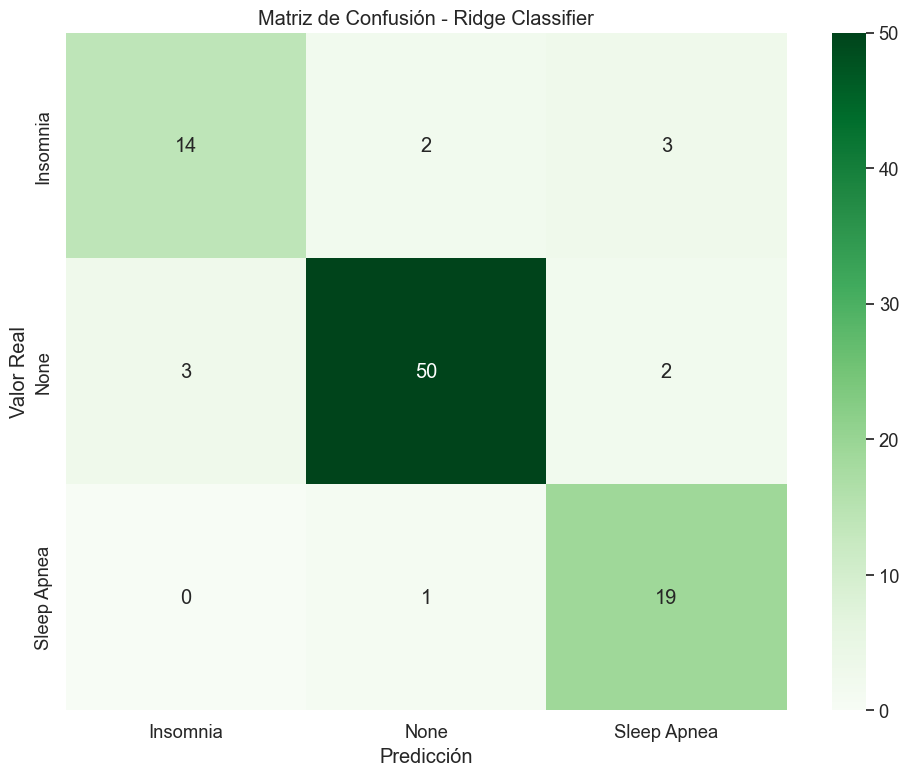

In [35]:
# Matriz de confusión - Ridge
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 8))
cm_ridge = confusion_matrix(y_test, y_pred_ridge)
sns.heatmap(cm_ridge, annot=True, fmt='d', cmap='Greens',
            xticklabels=ridge_pipeline.named_steps['ridge'].classes_,
            yticklabels=ridge_pipeline.named_steps['ridge'].classes_)

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Ridge Classifier')
plt.tight_layout()
plt.show()


El modelo Ridge logró clasificar correctamente la mayoría de los casos:

Insomnia: 14/19 correctamente predichos. Confunde algunos casos con None y Sleep Apnea.

None: 50/55 correctos. Es la clase mayoritaria y se predice bastante bien.

Sleep Apnea: 19/20 clasificados correctamente, con solo 1 error leve (predicho como None).


### Tabla de predicciones reales vs predichas

In [36]:
# Comparar predicciones y valores reales
import pandas as pd

results_ridge = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_pred_ridge
})

# Muestra aleatoria de ejemplos
print(" Muestra de predicciones vs valores reales:")
display(results_ridge.sample(10))


 Muestra de predicciones vs valores reales:


,Real,Predicción
41,None,None
106,None,Sleep Apnea
221,Insomnia,Insomnia
268,Sleep Apnea,Sleep Apnea
15,None,None
107,None,None
73,None,None
371,Sleep Apnea,Sleep Apnea
264,Insomnia,Sleep Apnea
51,None,None


###  Análisis de predicciones incorrectas

In [37]:
# Predicciones incorrectas
incorrect_ridge = results_ridge[results_ridge['Real'] != results_ridge['Predicción']]

print(f" Total de predicciones incorrectas: {len(incorrect_ridge)} de {len(results_ridge)} ({len(incorrect_ridge)/len(results_ridge):.1%})")


 Total de predicciones incorrectas: 11 de 94 (11.7%)


### Visualización en Espacio PCA — Ridge

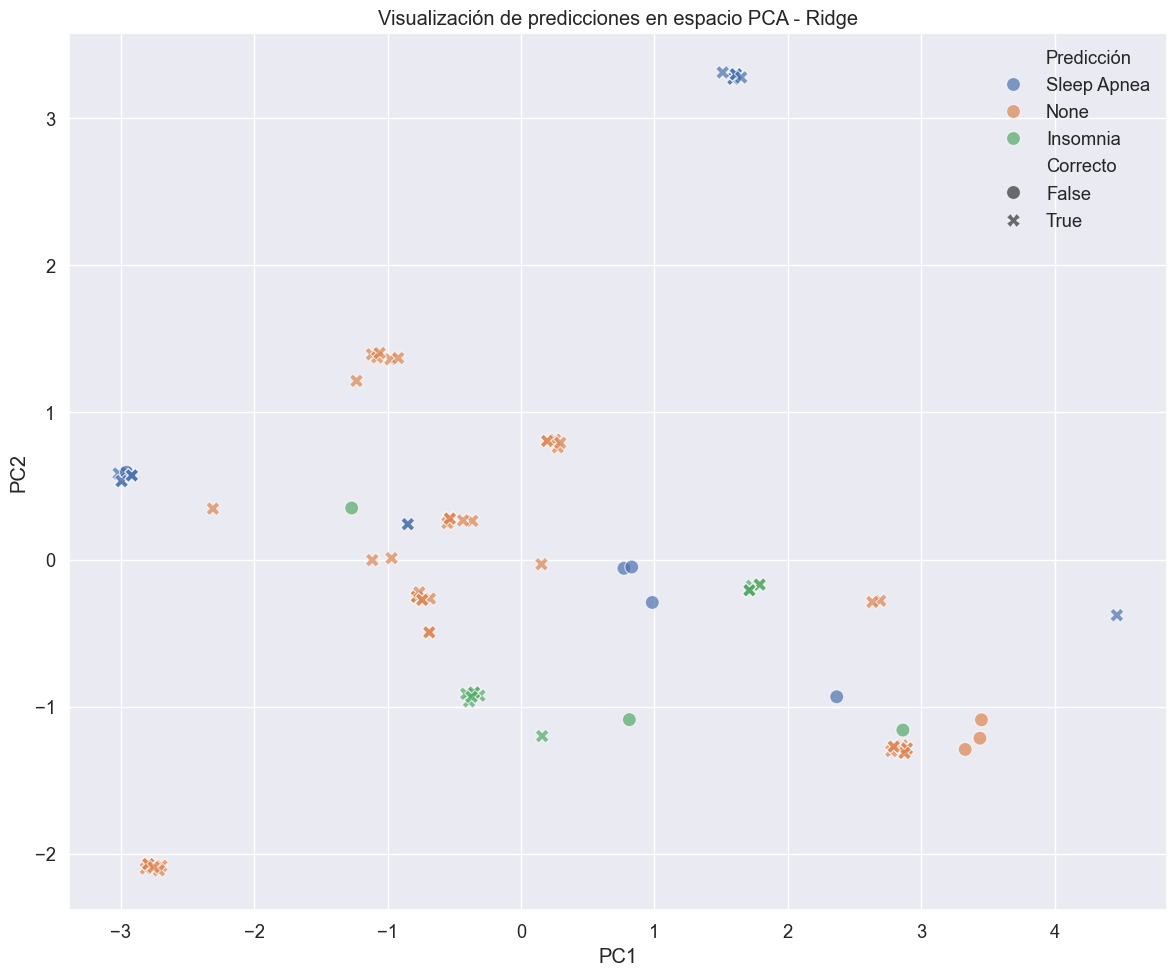

In [38]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Transformar X_test con el preprocesador del pipeline Ridge
X_test_preprocessed_ridge = ridge_pipeline.named_steps['preprocessor'].transform(X_test)

# Aplicar PCA para visualizar en 2D
pca_ridge = PCA(n_components=2)
X_test_pca_ridge = pca_ridge.fit_transform(X_test_preprocessed_ridge)

# Crear DataFrame para graficar
pca_df_ridge = pd.DataFrame({
    'PC1': X_test_pca_ridge[:, 0],
    'PC2': X_test_pca_ridge[:, 1],
    'Real': y_test,
    'Predicción': y_pred_ridge,
    'Correcto': y_test == y_pred_ridge
})

# Gráfico
plt.figure(figsize=(12, 10))
sns.scatterplot(data=pca_df_ridge, x='PC1', y='PC2', hue='Predicción', style='Correcto', s=100, alpha=0.7)
plt.title('Visualización de predicciones en espacio PCA - Ridge')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

La gráfica en el espacio de componentes principales (PCA) muestra que las clases están parcialmente separadas, aunque con algunas superposiciones entre 'None' y 'Sleep Apnea'. La codificación por color (predicción) y forma (acierto/error) permite observar que la mayoría de los puntos fueron correctamente clasificados, pero hay algunos errores en las zonas de frontera.

## Comparación de modelos: Random Forest vs Ridge Classifier

| Métrica                | Random Forest | Ridge Classifier |
|------------------------|----------------|------------------|
| Recall ponderado (test) | 0.9255         | 0.8830           |
| Balanced Accuracy      | 0.9240         | 0.8653           |
| F1 Macro               | 0.9069         | 0.8558           |
| Recall Train vs Test   | 0.9179 / 0.9255 | 0.8607 / 0.8830  |
| F1 Train vs Test       | 0.9173 / 0.9276 | 0.8605 / 0.8827  |
| Errores totales        | 7 de 94 (7.4%) | 11 de 94 (11.7%) |

###  Conclusión

Ambos modelos muestran un buen desempeño y generalización con bajo riesgo de sobreajuste. Sin embargo, el modelo **Random Forest** supera de manera consistente al **Ridge Classifier** en todas las métricas evaluadas. Además, comete menos errores de clasificación, lo cual es crucial en un contexto sensible como el diagnóstico de trastornos del sueño.

Por lo tanto, **Random Forest se recomienda como el modelo más adecuado** para este problema, destacándose especialmente por su capacidad para capturar relaciones no lineales entre variables y manejar desbalance de clases con técnicas como SMOTE.

In [40]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Definir X e y
X = data.drop(['Sleep_Disorder', 'Person_ID', 'Occupation', 'Blood_Pressure'], axis=1)
y = data['Sleep_Disorder']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Columnas
numeric_features = ['Age', 'Sleep_Duration', 'Quality_of_Sleep', 
                    'Physical_Activity_Level', 'Stress_Level', 
                    'Heart_Rate', 'Daily_Steps']
categorical_features = ['Gender', 'BMI_Category']

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Pipeline
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenamiento
rf_model.fit(X_train, y_train)

# Guardar modelo
joblib.dump(rf_model, "sleep_disorder_rf_model.pkl")
print("✅ Modelo guardado correctamente como sleep_disorder_rf_model.pkl")


✅ Modelo guardado correctamente como sleep_disorder_rf_model.pkl
